# # NBA player Cluster analysis #<br />

# Contents<br />

# 1. Introduction
## 1) 농구의 포지션 이란? 스탯?
### - 포지션
### - 스탯
## 2) Motivation
## 3) 데이터 수집 및 전처리<br />

# 2. Model setup
## 1) Classfication 모델 선택
### (1) kmeans(kmeans++)
### (2) heirarchical clustering
### (3) EM clustering
### (4) 가장 결과가 좋은 것? kmeans++
## 2)  클러스터 분석<br />

# 3. Apply basketball analysis by clustering data

# 4. Conclusion & further reserch
# 5. References<br /><br /><br /><br />

# I. Introduction<br />

## 1) 농구의 포지션 이란? 스탯?

### - 포지션
![position](https://static1.squarespace.com/static/561a6270e4b0cbb5768713d9/t/575ec9db2b8ddeb3fba7d478/1465829885170/Basketball+Positions)<br />

모든 NBA 선수들은 플레이하는 역할에 따른 '포지션'이라는 라벨을 가지고 있다.<br />
 전통적인 포지션은 다음과 같다<br />
  * **포인트 가드(PG)** - 팀의 **사령탑** 역할을 하며 보통 팀에서 가장 **전술적 이해**가 좋은 선수가 맡는다. 
  * **슈팅 가드(SG)** - **3PT** 등 장거리에서 슛을 하여 점수를 얻는 것을 주역할로 한다.
  * **스몰 포워드(SF)** - 점수를 얻는 것을 주된 역할로 한다. 외곽 슛, 속공 및 리바운드 싸움에도 참여할 수 있는 **올라운드 능력**이 요구됨.
  * **파워 포워드(PF)** - 코트 골밑에서 수비, 득점을 주요 역할로 하고 **리바운드**와 **골밑에서의 몸싸움 및 득점 능력** 등 파워풀한 플레이가 요구됨.
  * **센터(C)** - 골밑 중앙에서 활동하는 포지션. 공격에서는 **골밑슛**을 책임지고 수비에서는 가장  **페인트존을 책임지며** 상대의 슛을 블로킹으로 차단하는 역할까지 한다.<br />




### - 스탯
![position](http://cfile24.uf.tistory.com/image/236ADE335980760C33F998)

- 왼쪽 위부터 **리바운드**, **3점슛**, **블로킹**, **스틸**

  -- 리바운드 : 슈팅이 성공하지 못하고 **튕겨 나왔을 때** 잡는 것  
  
  -- 3점슛 : **24피트** 밖에서 던지는 슈팅  
  
  -- 블로킹 : 상대가 슛한 공을 수비가 반칙이 아닌 선에서 **쳐내는 것**  
  
  -- 스틸 : 상대가 가지고 있는 공을 반칙이 아닌 선에서 **가로채는 것**

   **이 밖에도 득점, 어시스트, 슛 성공율, 파울, 자유투 등 다양한 스탯들이 존재**

## 2) Motivation

하지만 오늘날의 게임 방식은 크게 달라졌다. 선수들의 **장거리 슛 성공률**이 높아짐에 따라 팀들의 3점 활용이 늘었고, 그에 따라 3점 슛을 방어하기 위해 바스켓에서 더 멀리 수비라인을 넓혀갔다. 이에 따라 수비라인 간격이 벌어지며 다른 플레이어가 3점 슛 라인 안쪽에서 활약할 수 있는 공간이 훨씬 넓어졌다. 이전에는 주로 3점 슛을 던지는 포지션이 **가드**였다면 현재는 모든 포지션에서 **3점슛의 점유율이 증가**하였다.<br />
 
![position](https://cdn-images-1.medium.com/max/800/1*V2oTbyr5gBcmEr_qAxEliw.jpeg)<br />


이 분석은 현대 농구의 플레이 스타일이 전통적인 방법으로 나눈 5개의 포지션 구분을 무너뜨렸다 생각하여 시작하게 되었다. 우리가 선택한 이 주제는 **전통적인 포지션 분류를 재정의** 하며 선수의 플레이 스타일에 따른 포지션의 재정의, 선수의 구분 그리고 그에 따른 **인사이트 발견을 통해 심도있는 선수분석**을 목적으로 한다.<br />

## 3) 데이터 수집 및 전처리

### - 데이터 출처

 * NBA.com
 * NBAminer.com
 * Basketball-reference
 * ESPN.com
 * Elias Sports Bureau
 * Spotrac.com  
 
### - 데이터 전처리
####  *이상치의 발생 및 처리
![position](http://cfile4.uf.tistory.com/image/2491B8335980818825F66C)
<br />
 
- 위의 그림에서 보다시피 **출전 경기가 적고, 출장시간이 적은 선수**들은 비율 스탯 등이 이상치로 나타날 수 있다. **ex)슛 성공율 100%, 0% 나타남**  
 이런 이상치를 제거하기 위해 **출전 경기 30경기 이상, 경기당 평균 출전시간 10분 이상**의 선수만 선택하여 진행하였다.
 
  각종 논문 및 리포트에서도 클러스터 분석 등에 총 한시즌 출전 시간 500분 이상, 30경기 이상 출전,   
  평균 출전시간 10분 이상, 평균 10분 이상 출전 등을 기준으로 하여 사용한 것을 볼 때 위의 기준이 **사용 가능**하다는 것을 알 수 있다.

#### *30게임 이상, 평균출전시간 10분 이상인 선수 추출

In [1]:
%matplotlib inline
pd.options.display.max_columns = 150

In [2]:
data = pd.read_csv("player2.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=30]
data = data[data["Min"]>=10]
data.shape

(6929, 152)

In [3]:
data.columns

Index([u'Player', u'Team', u'Season', u'Season Type', u'Games',
       u'Above the Break 3-Usage', u'Mid-Range-Usage',
       u'In The Paint (Non-RA)-Usage', u'Restricted Area-Usage',
       u'Right Corner 3-Usage',
       ...
       u'Assisted Layup %', u'Assisted Jump Shot %', u'Assists to Dunks PG',
       u'Assists to Layups PG', u'Assists to Jump Shots PG',
       u'Assists to 3 Pointers PG', u'Avg. Assisted Shot Distance',
       u'Avg. Assisted Jump Shot Distance', u'Assist PG', u'Pos'],
      dtype='object', length=152)

#### *변수 정리

col = [**Basic stats**
 : Games, Min, Pts, Reb, Ast .......  
**Clutch Time stats**
 : Total Points, FG% Diff, 3FG Diff .......  
**Advanced stats**
 : Total Plus/Minus, Ts%, Triple Doubles .......   
**Nasty stats**
 : Ejections, Blocks Against, Defensive 3Secs .......  
**Shot Distances**
 : Less than 8ft. %, Back Court Shots %, Avg. Shot Dis.(ft.) .......  
**Shot types**
 : Dunks, Jump Shot %, Assisted FGM %,  .......  
**Shot zones**
 : Above the Break 3-Usage, Right Corner 3-Usage, Restriced Area % .......  
**Assist Details**
 : Assted FG%, Avg. Assisted Shot Distance, Assisted Jump Shot %.......  
**Turnover Details**
 : Lost Ball TO PG, Bad Pass TO PG, Traveling PG.......  
**Foul Details**
 : Off.Fouls Drawn, Shooting Fouls Committed, Lost Ball Fouls.......  
**Four Point & And One**
 : Four Point Plays, And One, Extra Free Throw % .......]
 
 - 이번 분석에서는 총 **152개의 변수에서 실제 NBA 기록의 중요도 및 중복되는 부분을 감안하여 90개의 변수를 사용하여 분석**하였다.  
90개의 경우 농구 기록의 범위를 살펴볼 때 많은 것으로 여겨질 수 있지만,  
다른 논문에서 변수 각각이 설명할 수 있는 범위를 넓히기 위하여 **총 80개의 변수를 사용하였던 예**를 볼 때, **분류 정확도**를 높이기 위하여 90개의 변수를 사용하는 것은 무리가 없다고 가정하고 진행하였다.

In [4]:
data = data.reset_index()
del data["index"]

In [5]:
pos = data["Pos"]

In [6]:
player = data[["Player", "Team","Season"]]

In [7]:
dfX = data.iloc[:, 5:151]

In [9]:
dfy = data["Pos"]

In [10]:
C= dfX[dfX.Pos == "C"]
PF= dfX[dfX.Pos == "PF"]
SF= dfX[dfX.Pos == "SF"]
PG = dfX[dfX.Pos == "PG"]
SG = dfX[dfX.Pos == "SG"]

AttributeError: 'DataFrame' object has no attribute 'Pos'

In [11]:
dfX = dfX.iloc[:,:-1]

#### * 데이터 스케일링
- StandardScaler를 통한 데이터 스케일링


In [12]:
from sklearn.preprocessing import StandardScaler
stdDf= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

# 2. Model setup

### (1) kmeans(kmeans++)

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="k-means++", random_state=1).fit(stdDf.iloc[:,:-1])
model = model.predict(stdDf.iloc[:,:-1])
dfX["cluster"] = model

### (2) hierarchical clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=10).fit(stdDf.iloc[:,:-1])
model_2 = model2.labels_

### (3) EM clustering

In [15]:
from sklearn.mixture import GaussianMixture
model3 = GaussianMixture(n_components=10, init_params='random', random_state=0).fit(stdDf.iloc[:,:-1])
model_3 = model3.predict(stdDf.iloc[:,:-1])

### (4) 가장 결과가 좋은 것? kmeans++

In [16]:
def silhouette(df, label):
    from sklearn.metrics import silhouette_score
    a = silhouette_score(df, label)
    return a 

In [17]:
kmeans = silhouette(stdDf.iloc[:,:-1], model)
hierarchical = silhouette(stdDf.iloc[:,:-1], model_2)
EM = silhouette(stdDf.iloc[:,:-1], model_3)

In [18]:
result = pd.DataFrame([kmeans, hierarchical,EM]).rank(ascending=False)
result.index = ["k-means","Hierarchical","EM"]

In [19]:
result

,0
k-means,1.0
Hierarchical,3.0
EM,2.0


#### k-means의 silhouette 값이 제일 높으므로 이하에서는 k-means로 클러스터링을 진행하도록 하겠다.<br /><br /><br />

## 2) 클러스터 분석

### - 클러스터 속성 분석

10개의 클러스터를 인덱스로 feature 평균을 데이터프레임으로 작성, 클러스터별 속성을 분석하였다

In [60]:
mean_kmeans[["Pts", "3PTA","Jump Shots", "OReb", "Dreb",  "Blk", "Ast", "Stl",  
       'Above the Break 3-Usage', 'Mid-Range-Usage','In The Paint (Non-RA)-Usage', 'Restricted Area-Usage',
       'Right Corner 3-Usage', 'Left Corner 3-Usage', 'Assists to Dunks PG', 'Assists to Layups PG', 'Assists to Jump Shots PG','Dunks','Layups',
       'Assists to 3 Pointers PG' , 'Min']].sort_values(by="Pts", ascending=False)

,Pts,3PTA,Jump Shots,OReb,Dreb,Blk,Ast,Stl,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Dunks,Layups,Assists to 3 Pointers PG,Min
2,23.145440,4.529057,73.522547,1.078176,4.256981,0.461132,5.038711,1.422233,20.907170,35.295975,11.872767,27.482264,1.945189,2.312547,0.725031,1.224560,3.066038,3.345377,22.418113,1.327233,37.565629
7,17.830720,0.599259,62.866296,2.584506,6.582325,1.331132,2.516152,0.953642,3.067778,34.630514,21.524918,39.740700,0.452531,0.483498,0.273374,0.720679,1.504403,8.403683,25.604074,0.683374,34.564403
9,15.082605,3.021953,72.022372,0.727000,3.052628,0.241605,6.898814,1.407698,19.220209,33.891558,13.764163,29.200116,1.690070,1.975860,0.929070,1.713419,4.212279,0.901186,26.721628,1.546977,33.786326
5,14.523475,3.633557,74.238610,1.026007,3.518351,0.429152,2.709965,1.072744,21.465230,31.804511,11.289246,26.914028,3.999753,4.332697,0.336572,0.685724,1.674335,3.414393,21.184794,0.652085,32.026973
6,9.401543,0.084215,48.430689,2.437824,4.719421,1.108898,1.127287,0.651598,0.665220,22.600826,21.188030,55.192424,0.133581,0.132617,0.119353,0.306763,0.696515,13.012879,32.302052,0.293251,26.072342
1,7.981317,2.084837,76.030548,0.405359,1.775919,0.131121,3.279948,0.782894,21.781969,34.861265,11.874172,24.975854,2.944850,3.156128,0.407184,0.756649,2.097366,0.809961,22.838657,0.761421,22.138540
3,7.966642,3.287481,82.348990,0.567418,2.318023,0.267758,1.489872,0.668321,32.179022,25.459065,7.216238,18.450202,8.063783,8.436111,0.181190,0.363858,0.937099,2.212880,14.399033,0.386801,22.288725
4,7.350295,0.539589,67.655285,1.261414,2.862078,0.464736,1.243281,0.644304,4.977848,43.565633,14.466002,34.099030,1.381498,1.356857,0.140316,0.318882,0.775359,5.611213,23.723323,0.288165,21.087500
8,4.659887,1.433136,74.321758,0.479072,1.484219,0.178326,1.184965,0.493741,21.155134,31.235865,10.134205,26.867412,5.080127,5.213066,0.141505,0.276948,0.759831,2.817173,21.506343,0.289339,14.774599
0,4.471009,0.047530,43.780133,1.454980,2.494064,0.606879,0.574436,0.422404,0.702271,20.000505,19.165339,59.598194,0.202537,0.222975,0.059575,0.149323,0.362417,13.302417,35.611660,0.148858,15.583240


In [22]:
first_cluster = dfX

In [23]:
def cluster_plot(dfX, n_clusters):
    col =  dfX.columns

    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

    plt.figure(figsize=(16,9), dpi=200)

    plt.subplot(311)
    half = int((len(col) - 4) / 2)
    c = col[ : half]
    ind = range(len(c))
    
    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[:half], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


    plt.subplot(313)
    c = col[half : len(col)-1]
    ind = range(len(c))

    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[half:len(b)-1], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    plt.show()

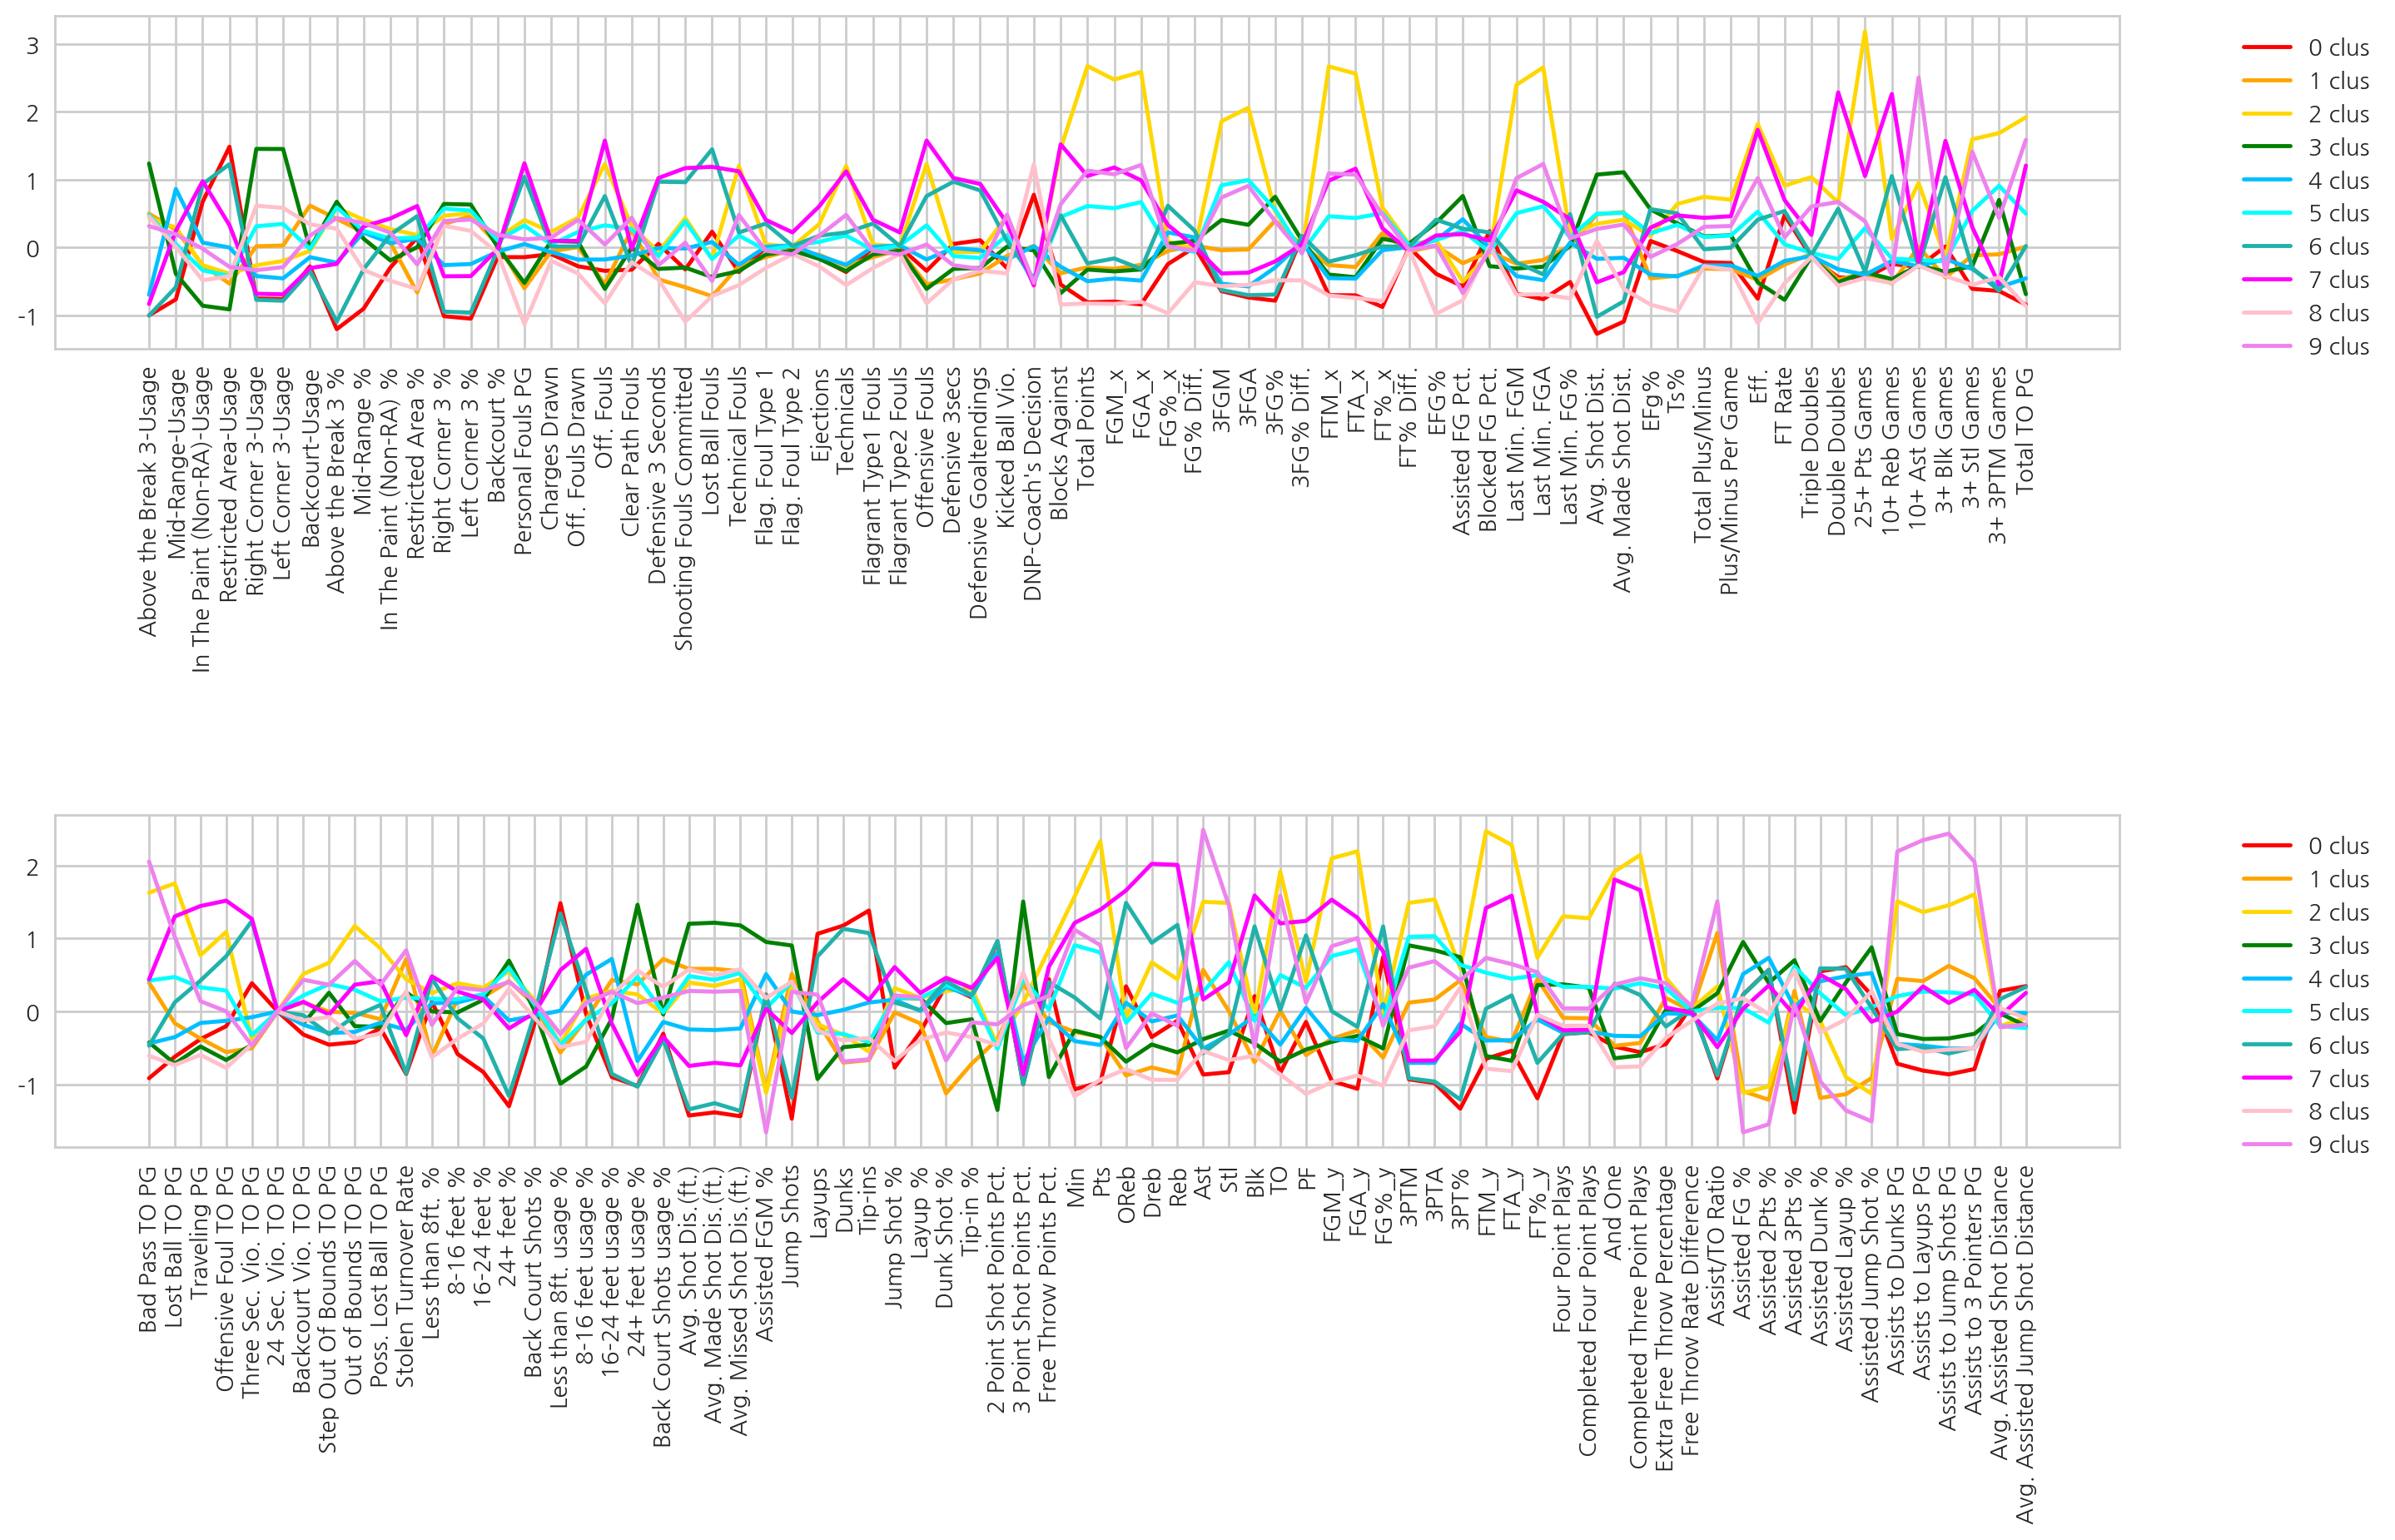

In [24]:
stdDf["cluster"] = model
cluster_plot(stdDf, 10)

* Classic big : 골밑에서의 **득점**,수비 **블록**에 능한 선수(주로 어시스트 받아서 득점) #0 
* Aggressive big : **공격 리바운드와 블록, 득점력**이 강한 선수 #6  
* Non-scoring Big : **리바운드와 블록에 강점**이 있지만 득점력이 약한 선수 #7  
* Midrange Stopper : **필드골 득점력과 리바운드** 및 **블록샷 등 수비**에 강점이 있는 선수 #4
* Balanced wing scorer : **측면 공격, 3점슛, 패스를 받아 넣는 필드골**에 강점이 있는 선수 #5
* Ball Handler : 돌파 등을 통해서 **본인이 만들어서 득점을 하며 2차 어시스트**에 강점이 있는 선수 #1
* Long shooter : **3점 슛 득점력이 가장 뛰어난** 선수 #3
* All-Round Player : **득점, 어시스트, 리바운드, 3점 슛 성공률**등 여러 스탯에 강점이 있는 선수 #2
* Defensive passer : **어시스트와 스틸에 강점**이 있고 **수비적**인 성향이 강한 선수 #8
* Commander : **어시스트를 주력**으로 하는 **득점력**을 겸비한 **플레이메이커** #9


클러스터에 높은 값을 가진 feature 순위를 매겨 중요속성을 골라내었고, 선수의 플레이스타일을 정의하여 클러스터에 새롭게 라벨링을 해주었다.

In [101]:
naming = ["Classic big ","Ball Handler","All-Round Player","Long shooter","Midrange Stopper","Balanced wing scorer","Aggressice big","Non-scoring Big","Defensive passer","Commander"]

In [102]:
data = data.reset_index()
del data["index"]

In [103]:
first_cluster["Player"] = data["Player"]
first_cluster["Season"] = data["Season"]
first_cluster["Team"] = data["Team"]
first_cluster["Pos"] = pos

<br />

# 3. Apply basketball analysis by clustering data<br />

## 전체 시즌, 전체 포지션의 흐름

In [104]:
season = np.unique(first_cluster["Season"])
season

array(['1996-1997', '1997-1998', '1998-1999', '1999-2000', '2000-2001',
       '2001-2002', '2002-2003', '2003-2004', '2004-2005', '2005-2006',
       '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017'], dtype=object)

In [105]:
season0 = pd.DataFrame(first_cluster[first_cluster["Season"]=="1996-1997"]["cluster"].value_counts().sort_index())

for i in season[1:]:
    a = pd.DataFrame(first_cluster[first_cluster["Season"]==i]["cluster"].value_counts().sort_index())
    season0 = pd.concat([season0, a], axis=1)
    
season0.columns = season

In [106]:
season0.loc["sum", :] = season0.sum()

In [107]:
season0

,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,37.0,43.0,35.0,32.0,41.0,32.0,47.0,43.0,28.0,35.0,33.0,32.0,41.0,35.0,44.0,39.0,34.0,37.0,26.0,32.0,27.0
1,36.0,41.0,31.0,34.0,38.0,37.0,31.0,37.0,35.0,31.0,39.0,42.0,27.0,36.0,31.0,41.0,31.0,33.0,42.0,45.0,49.0
2,10.0,8.0,1.0,13.0,15.0,14.0,18.0,19.0,22.0,18.0,21.0,22.0,19.0,14.0,16.0,5.0,13.0,16.0,11.0,18.0,25.0
3,17.0,27.0,31.0,35.0,30.0,29.0,23.0,26.0,37.0,39.0,41.0,46.0,48.0,54.0,63.0,52.0,63.0,59.0,74.0,67.0,80.0
4,39.0,53.0,58.0,61.0,55.0,56.0,46.0,57.0,52.0,51.0,39.0,43.0,32.0,41.0,40.0,45.0,47.0,35.0,36.0,36.0,26.0
5,42.0,32.0,34.0,40.0,32.0,36.0,43.0,42.0,40.0,39.0,45.0,35.0,52.0,46.0,36.0,38.0,39.0,48.0,43.0,44.0,43.0
6,35.0,36.0,28.0,32.0,38.0,41.0,37.0,32.0,47.0,39.0,43.0,30.0,34.0,26.0,34.0,30.0,33.0,32.0,38.0,32.0,29.0
7,33.0,29.0,19.0,27.0,22.0,24.0,24.0,26.0,28.0,25.0,25.0,22.0,20.0,27.0,27.0,18.0,21.0,21.0,17.0,18.0,13.0
8,26.0,31.0,30.0,22.0,30.0,26.0,36.0,31.0,37.0,29.0,29.0,35.0,38.0,28.0,28.0,42.0,40.0,34.0,46.0,43.0,50.0
9,20.0,18.0,18.0,18.0,21.0,22.0,15.0,16.0,17.0,19.0,19.0,19.0,22.0,23.0,27.0,25.0,25.0,24.0,27.0,22.0,13.0


In [108]:
naming2 = naming + ["sum"]

In [109]:
season0 = season0.fillna(0)
season0.astype(int)
season0.index = naming2
season0

,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Classic big,37.0,43.0,35.0,32.0,41.0,32.0,47.0,43.0,28.0,35.0,33.0,32.0,41.0,35.0,44.0,39.0,34.0,37.0,26.0,32.0,27.0
Ball Handler,36.0,41.0,31.0,34.0,38.0,37.0,31.0,37.0,35.0,31.0,39.0,42.0,27.0,36.0,31.0,41.0,31.0,33.0,42.0,45.0,49.0
All-Round Player,10.0,8.0,1.0,13.0,15.0,14.0,18.0,19.0,22.0,18.0,21.0,22.0,19.0,14.0,16.0,5.0,13.0,16.0,11.0,18.0,25.0
Long shooter,17.0,27.0,31.0,35.0,30.0,29.0,23.0,26.0,37.0,39.0,41.0,46.0,48.0,54.0,63.0,52.0,63.0,59.0,74.0,67.0,80.0
Midrange Stopper,39.0,53.0,58.0,61.0,55.0,56.0,46.0,57.0,52.0,51.0,39.0,43.0,32.0,41.0,40.0,45.0,47.0,35.0,36.0,36.0,26.0
Balanced wing scorer,42.0,32.0,34.0,40.0,32.0,36.0,43.0,42.0,40.0,39.0,45.0,35.0,52.0,46.0,36.0,38.0,39.0,48.0,43.0,44.0,43.0
Aggressice big,35.0,36.0,28.0,32.0,38.0,41.0,37.0,32.0,47.0,39.0,43.0,30.0,34.0,26.0,34.0,30.0,33.0,32.0,38.0,32.0,29.0
Non-scoring Big,33.0,29.0,19.0,27.0,22.0,24.0,24.0,26.0,28.0,25.0,25.0,22.0,20.0,27.0,27.0,18.0,21.0,21.0,17.0,18.0,13.0
Defensive passer,26.0,31.0,30.0,22.0,30.0,26.0,36.0,31.0,37.0,29.0,29.0,35.0,38.0,28.0,28.0,42.0,40.0,34.0,46.0,43.0,50.0
Commander,20.0,18.0,18.0,18.0,21.0,22.0,15.0,16.0,17.0,19.0,19.0,19.0,22.0,23.0,27.0,25.0,25.0,24.0,27.0,22.0,13.0


In [110]:
# 각 시즌 전체 선수에 따른 해당 클러스터의 비율 
season1 = season0.iloc[:10,0:] / season0.loc["sum"]

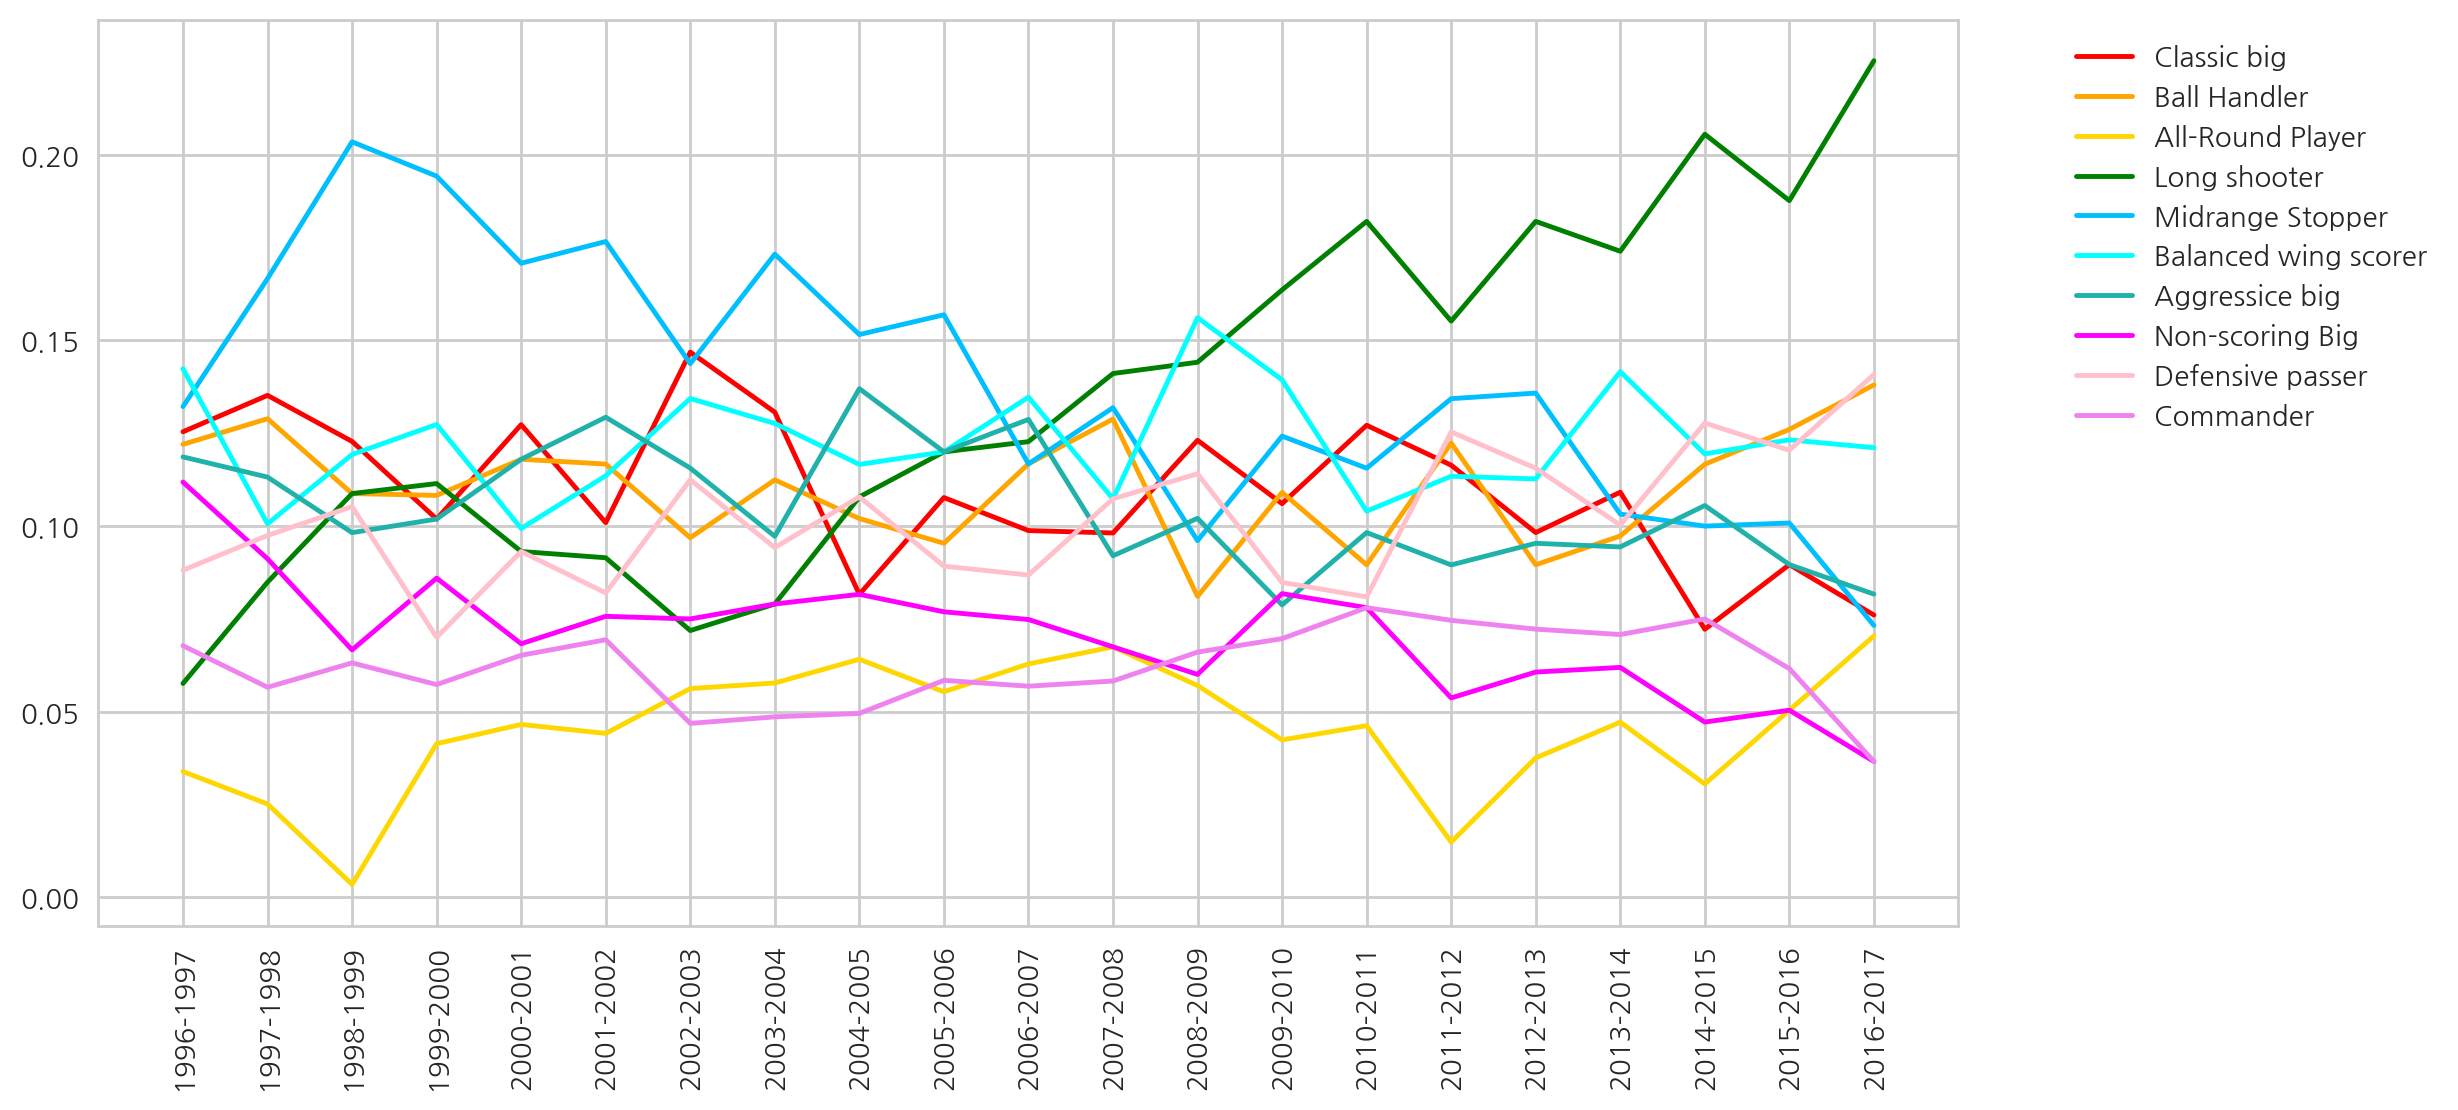

In [111]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)

for i in range(10):
    plt.plot(np.array(season1.iloc[i,:]), color=color[i], label = naming[i])

plt.xticks(range(21), season1.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 1. Balanced wing scorer , Long shooter는 증가의 추세를 가지며  
#### 2. Midrange stopper는 감소의 추세를 가진다.
#### 3. 하지만 나머지 포지션 같은 경우에는 시즌별 편차가 있어서 시대별 흐름에 따라 이를 더 자세히 검토하도록 하겠다.

- 1990 ~ 1999 : 센터의 시대(4대 센터)
- 2000 ~ 2009 : 슈팅가드의 전성시대
- 2010 ~ 2017 : 스몰볼 시대

(출처 : http://www.rookie.co.kr/news/articleView.html?idxno=6126)

## 1996 ~ 2017 추세

### r-square 값을 구해서 0.5이상인 것 들만 추세선으로 표현

In [114]:
coef = np.zeros([10,2])
coef_1 = np.zeros([10,2])
coef_2 = np.zeros([10,2])
coef_3 = np.zeros([10,2])

In [115]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(21).reshape(-1,1),season0.iloc[i,:])
    coef[i][0] = model.intercept_
    coef[i][1] = model.coef_
    print(model.score(np.arange(21).reshape(-1,1),season0.iloc[i,:]))

0.127303807304
0.101714355659
0.126153759356
0.887567623323
0.523313330716
0.218076610396
0.0666247582205
0.456308627678
0.547879362577
0.172451612903


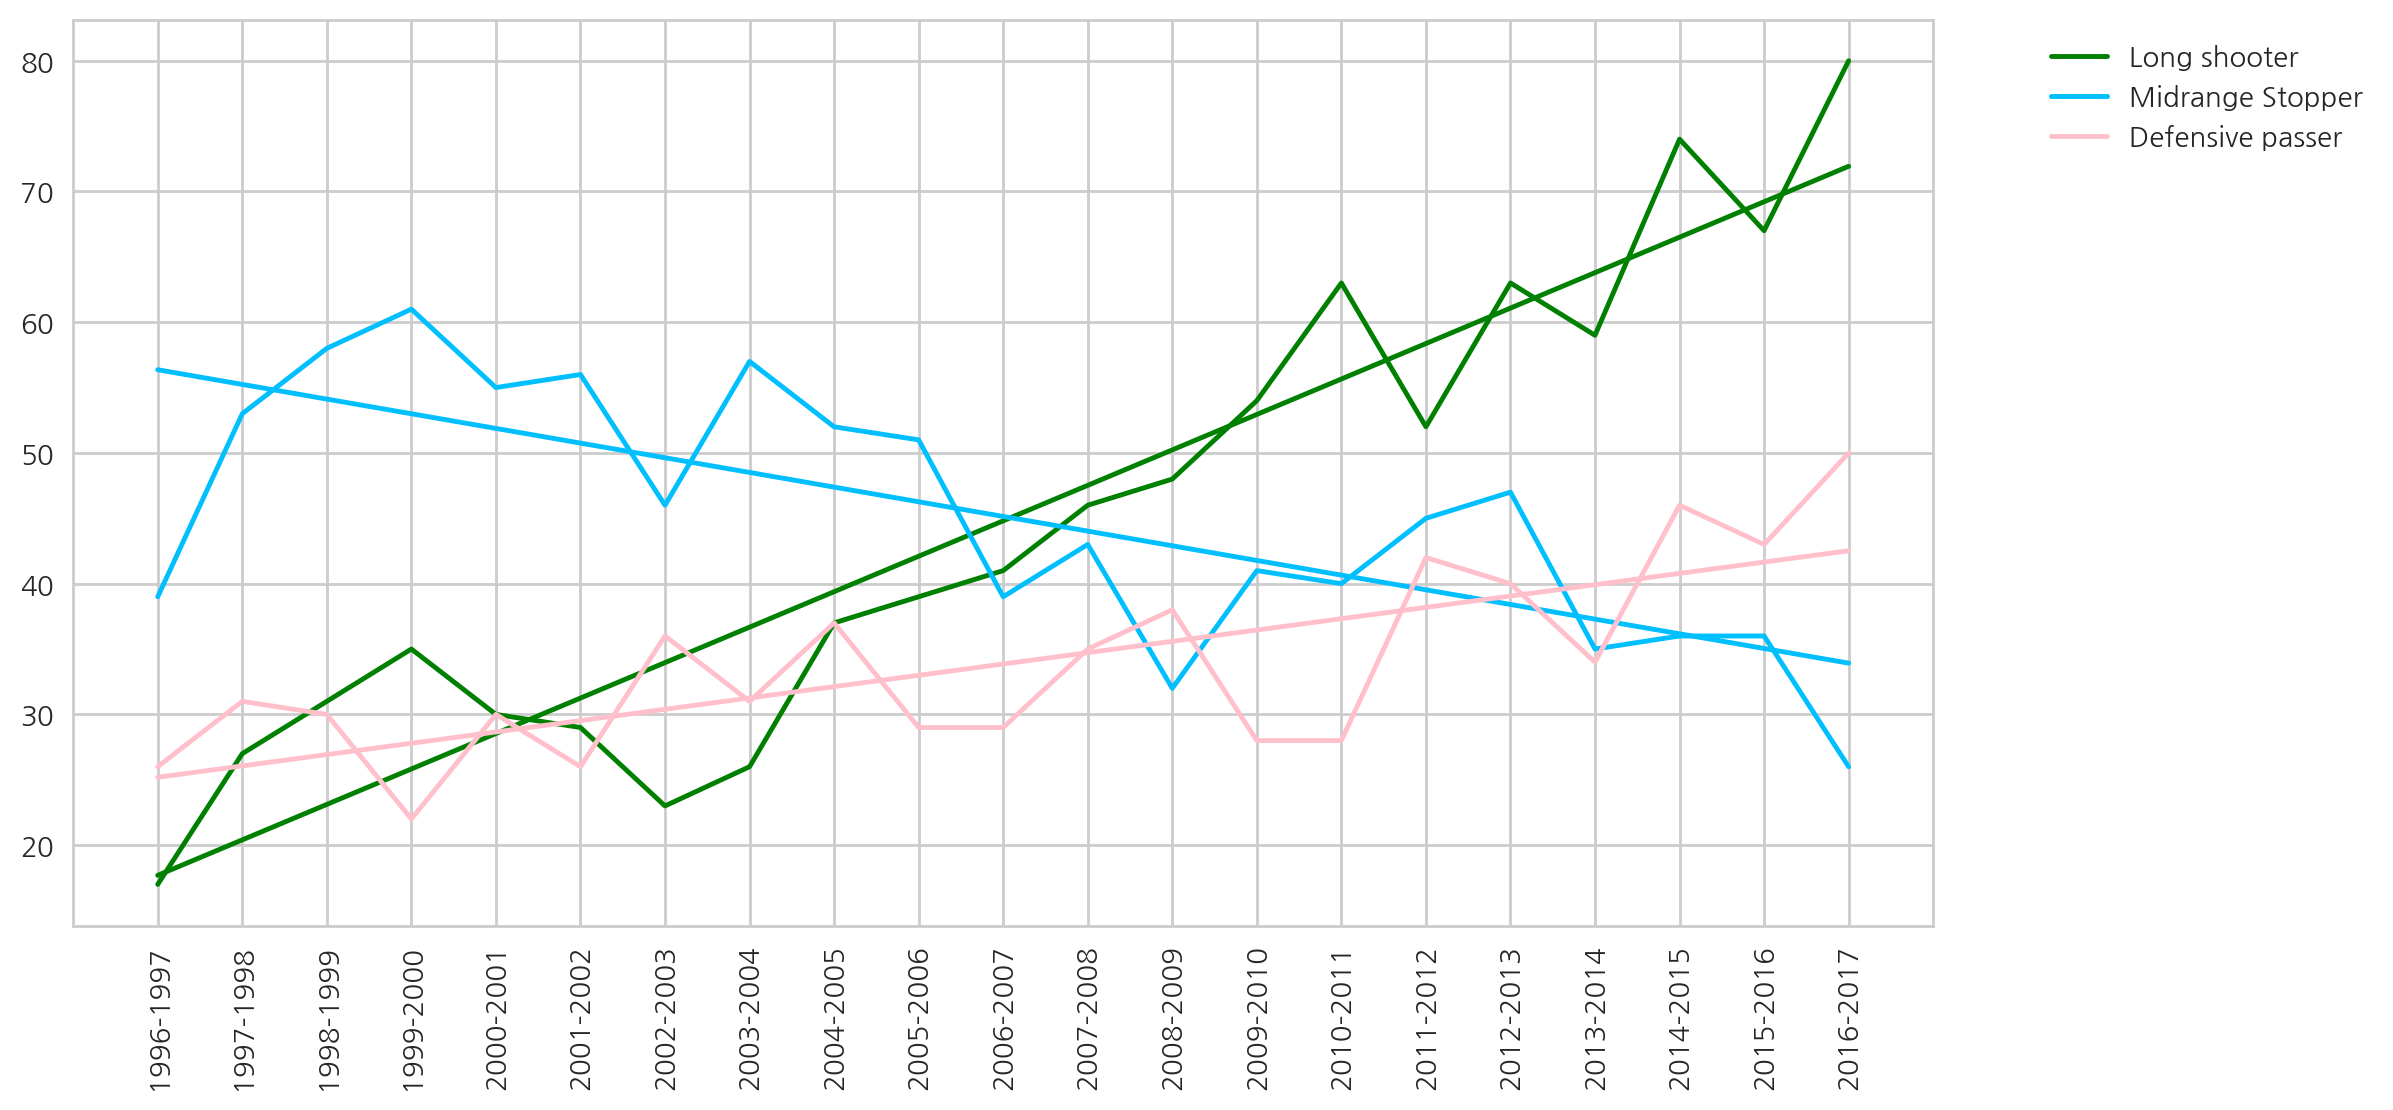

In [116]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(21)

for i in [3,4,8]:
    plt.plot(np.array(season0.iloc[i,:]), color=color[i], label = naming[i])
    plt.plot(t, coef[i][0] + coef[i][1]*t, color=color[i])

plt.xticks(range(21), season0.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

 #### 위에서 확인한 바와 같이,  Balanced wing scorer , Long shooter,  Midrange stopper는 전체 연도별 흐름에서 일정한 추세를 가지고 있는 것을 알 수 있었다. 이는 점점 90년대에는 센터 위주의 농구 였지만 점점 가드 위주의 농구로 전환됨에 따라 이런 추세를 띈 것으로 보인다.

## 1999년 이전 추세

In [117]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(3).reshape(-1,1),season0.iloc[i,:3])
    coef_1[i][0] = model.intercept_
    coef_1[i][1] = model.coef_
    print(model.score(np.arange(3).reshape(-1,1),season0.iloc[i,:3]))

0.0576923076923
0.25
0.90671641791
0.942307692308
0.930412371134
0.571428571429
0.644736842105
0.942307692308
0.571428571429
0.75


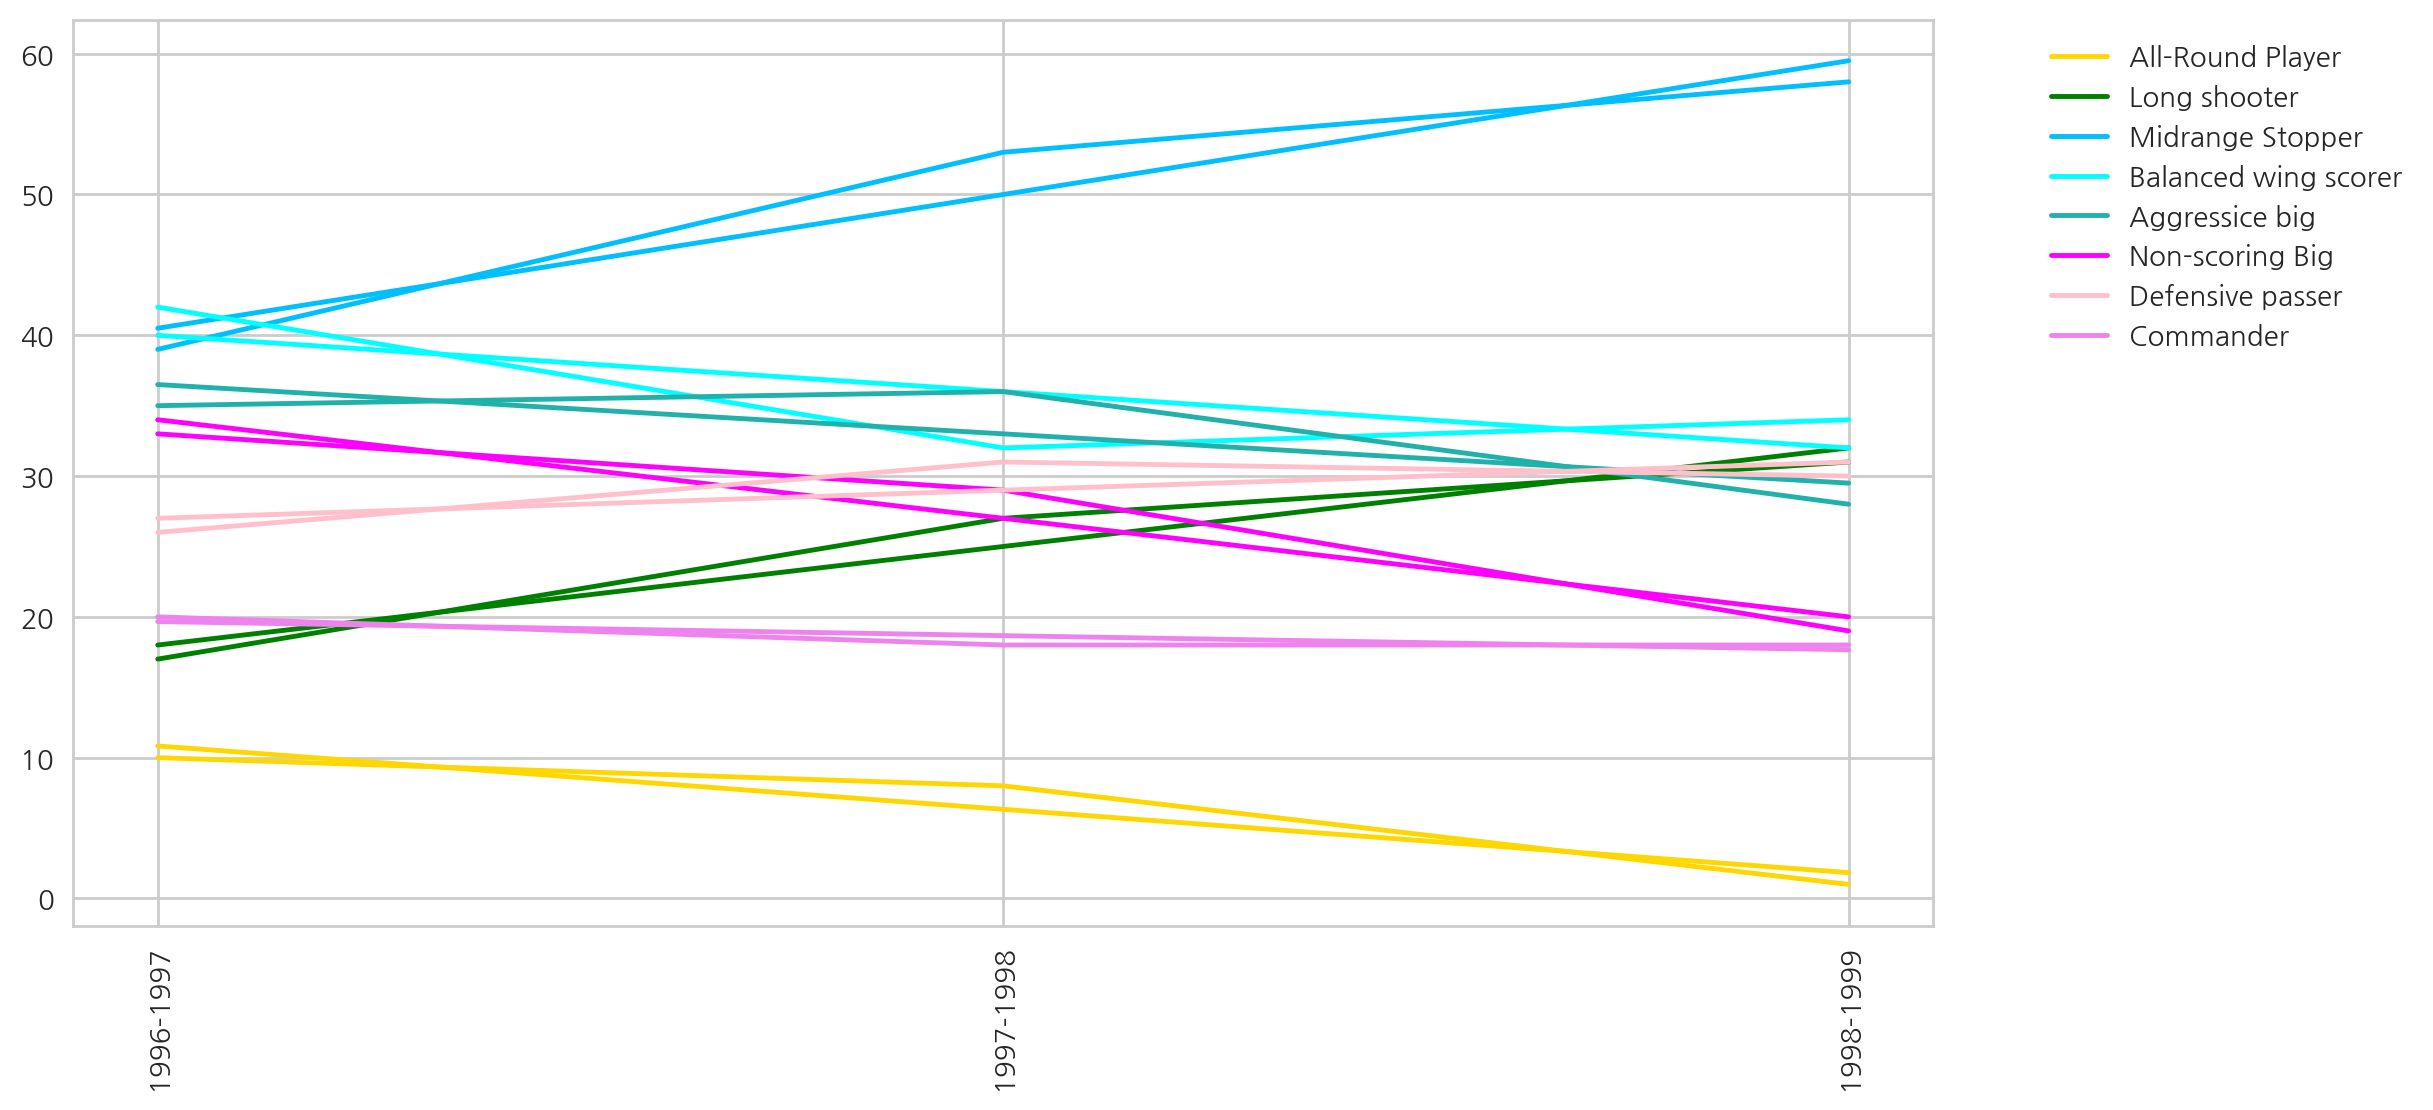

In [118]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(3)

for i in [2,3,4,5,6,7,8,9]:
    plt.plot(np.array(season0.iloc[i,:3]), color=color[i], label = naming[i])
    plt.plot(t, coef_1[i][0] + coef_1[i][1]*t, color=color[i])

plt.xticks(range(3), season0.columns[:3], rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 3개년도를 기준으로 해서 r-square값이 0.5이상 나오는것이 많아서 특징을 뽑아낼 수 가 없었다.

## 1999 - 2009년 추세

In [119]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(10).reshape(-1,1),season0.iloc[i,3:13])
    coef_2[i][0] = model.intercept_
    coef_2[i][1] = model.coef_
    print(model.score(np.arange(10).reshape(-1,1),season0.iloc[i,3:13]))

0.00697931132714
0.0123481884242
0.648497896076
0.582141209045
0.722749397709
0.270865075334
0.000562229642123
0.157340502997
0.404389585148
0.0234907211651


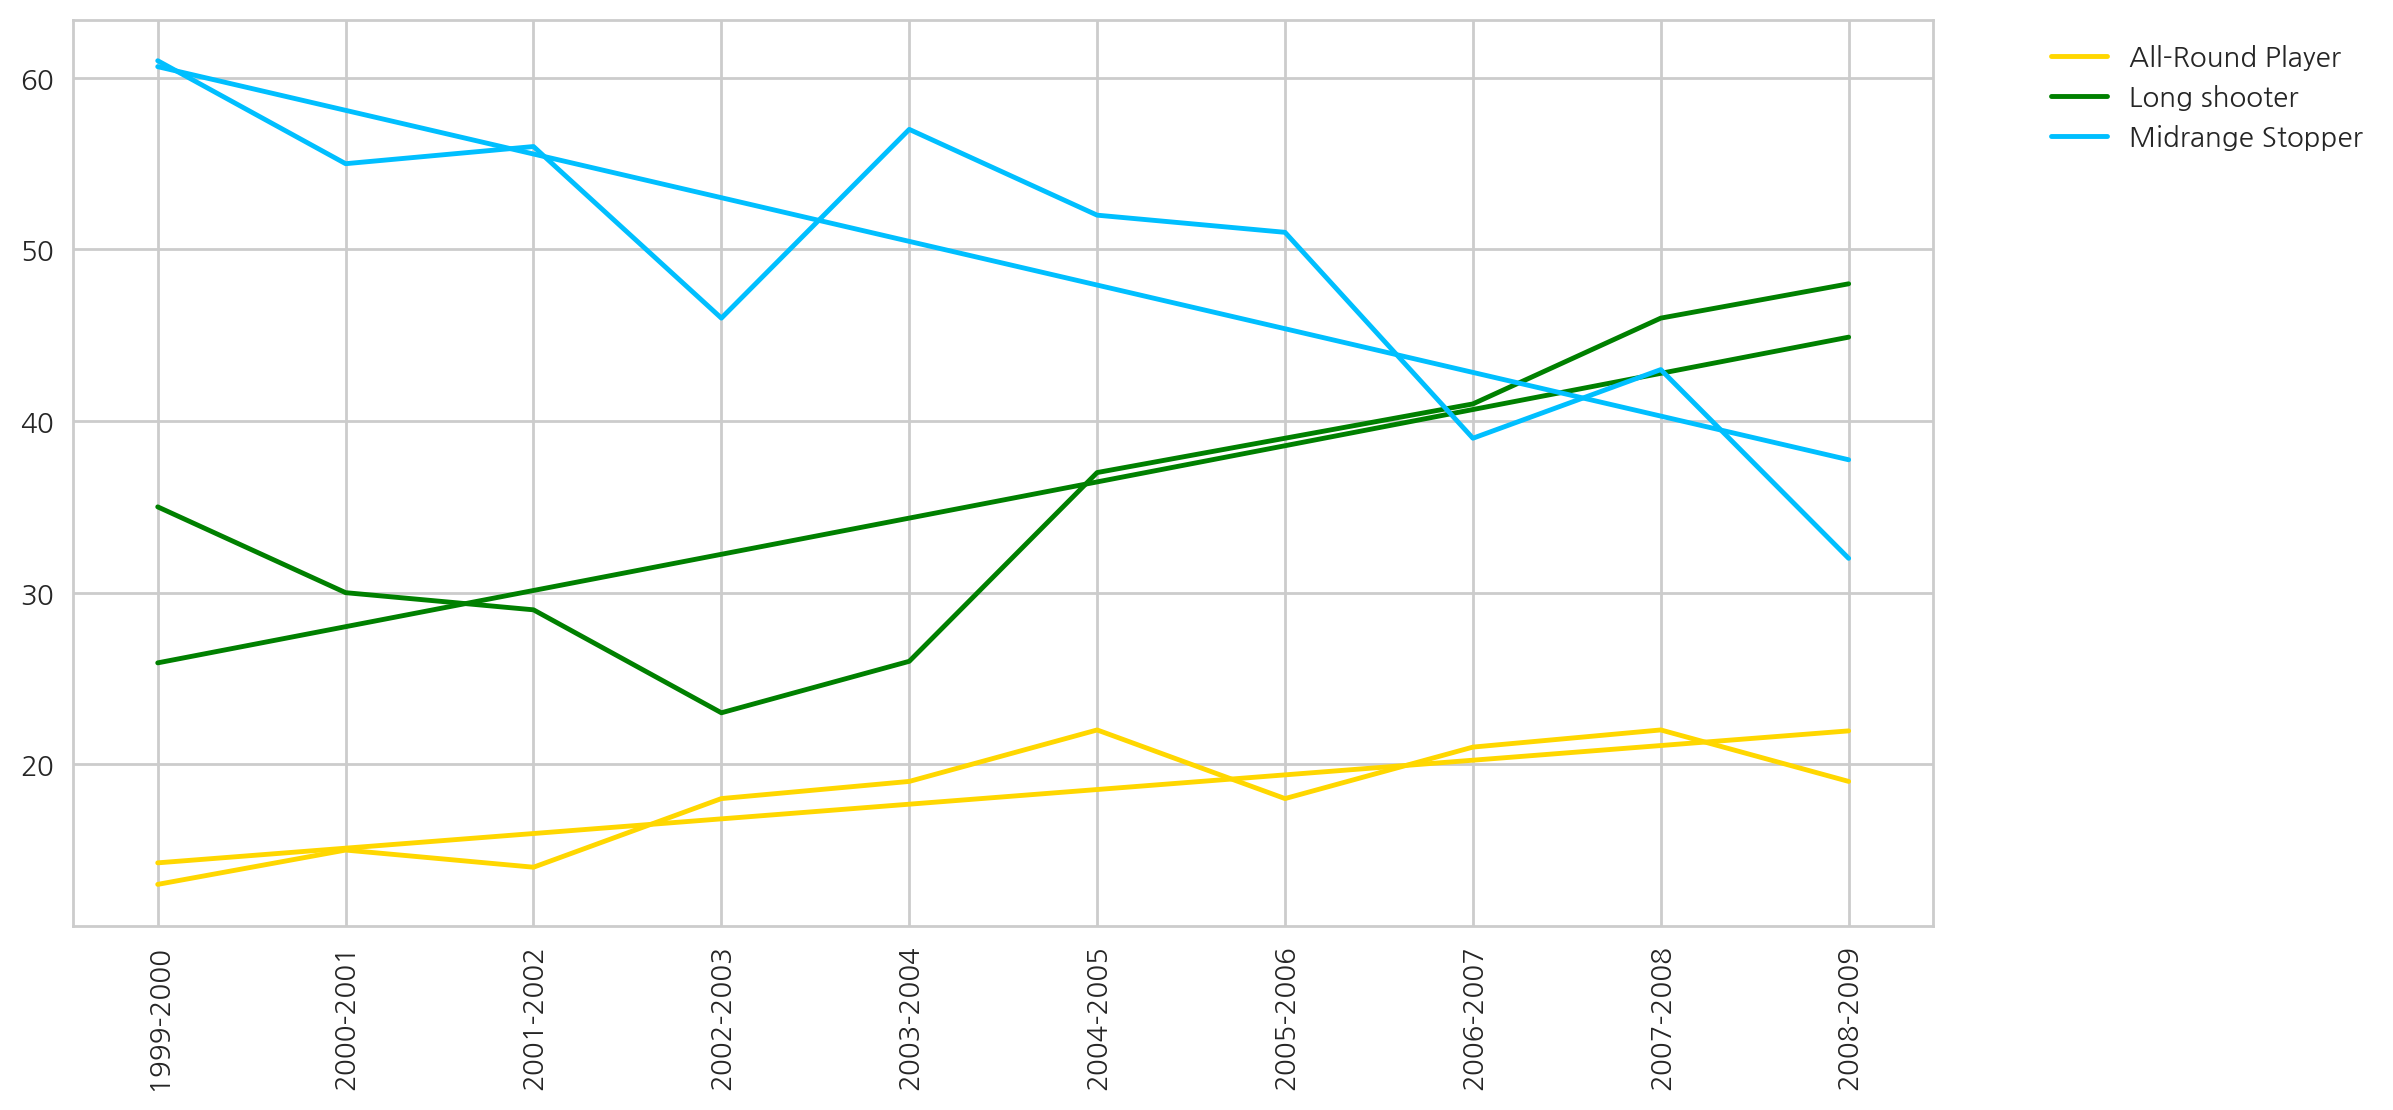

In [120]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(10)

for i in [2,3,4]:
    plt.plot(np.array(season0.iloc[i,3:13]), color=color[i], label = naming[i])
    plt.plot(t, coef_2[i][0] + coef_2[i][1]*t, color=color[i])

plt.xticks(range(10), season0.columns[3:13], rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 슈팅가드의 시대가 시작됨에 따라, shooter와 관련된 포지션의 증가를 확인할 수 있다.

## 2010- 이후 추세

In [121]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(8).reshape(-1,1),season0.iloc[i,13:])
    coef_3[i][0] = model.intercept_
    coef_3[i][1] = model.coef_
    print(model.score(np.arange(8).reshape(-1,1),season0.iloc[i,13:]))

0.546814351983
0.512574404762
0.299907435977
0.652291105121
0.527496665882
0.0925842471584
0.0768821495078
0.766652280247
0.710170646709
0.340737001514


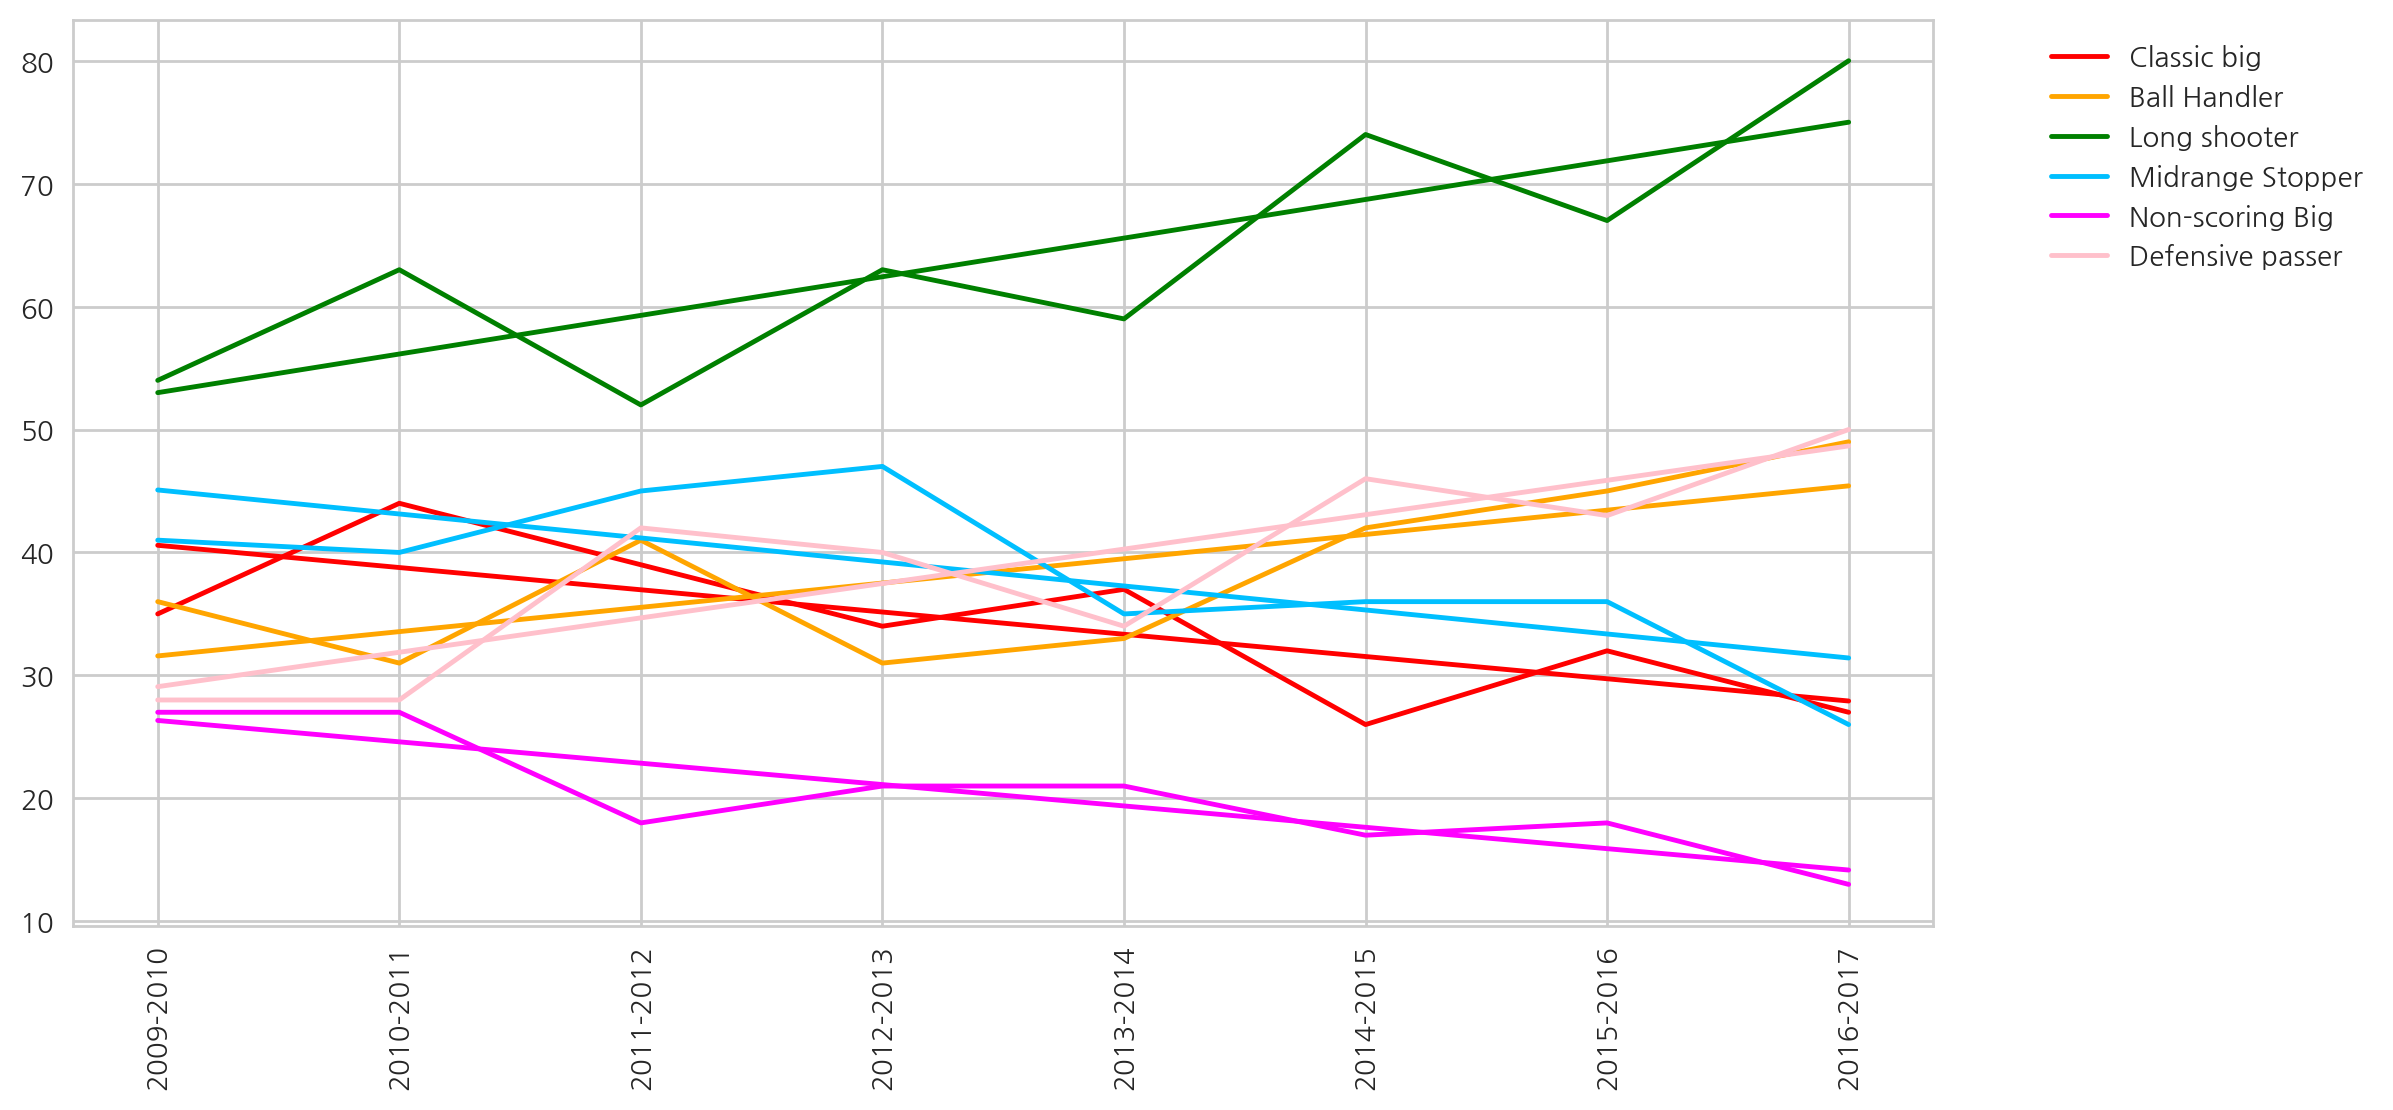

In [122]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(8)

for i in [0,1,3,4,7,8]:
    plt.plot(np.array(season0.iloc[i,13:]), color=color[i], label = naming[i])
    plt.plot(t, coef_3[i][0] + coef_3[i][1]*t, color=color[i])

plt.xticks(range(8), season0.columns[13:], rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 스몰볼의 흐름에 따라서  Long shooter, Ball Handler, Balancer wing scorer의 증가를 확인 할 수 있었다.

#### 위에서 조사한 것은 연도별 선형관계가 있는 증가와 감소만을 확인할 수 있으므로 각 포지션별의 상관관계에 대해서 살펴보도록 하겠다.

# 각 포지션끼리의 상관관계 

In [123]:
def heatmap(df):
    plt.figure(figsize=(12,12))
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True,cmap="BuGn",annot=True)
    plt.show()
    return ax

### 전체 시즌에 대한 상관관계

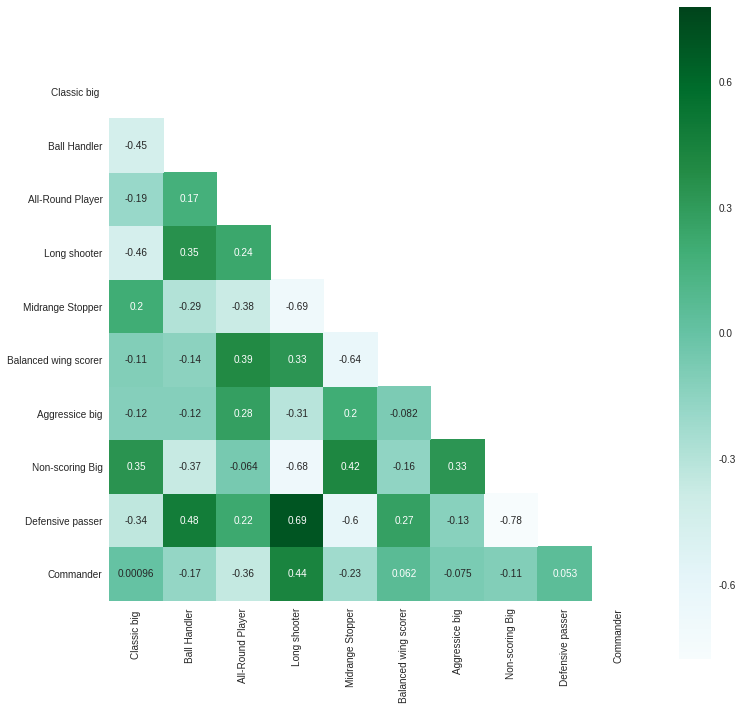

In [124]:
heatmap(season0.iloc[:-1,:].T)

### 1999년도 까지의 상관관계

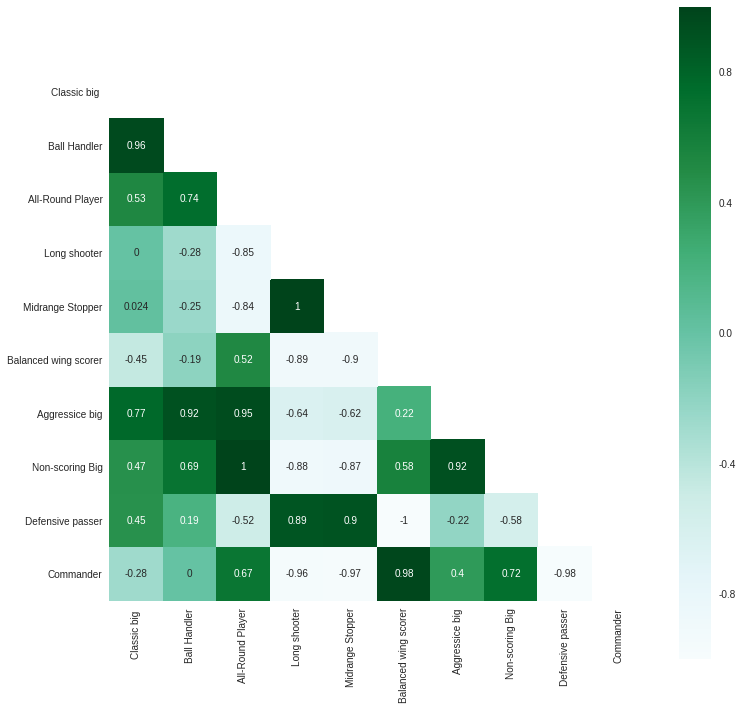

In [125]:
heatmap(season0.iloc[:-1,:3].T)

### 1999-2009년도의 상관관계

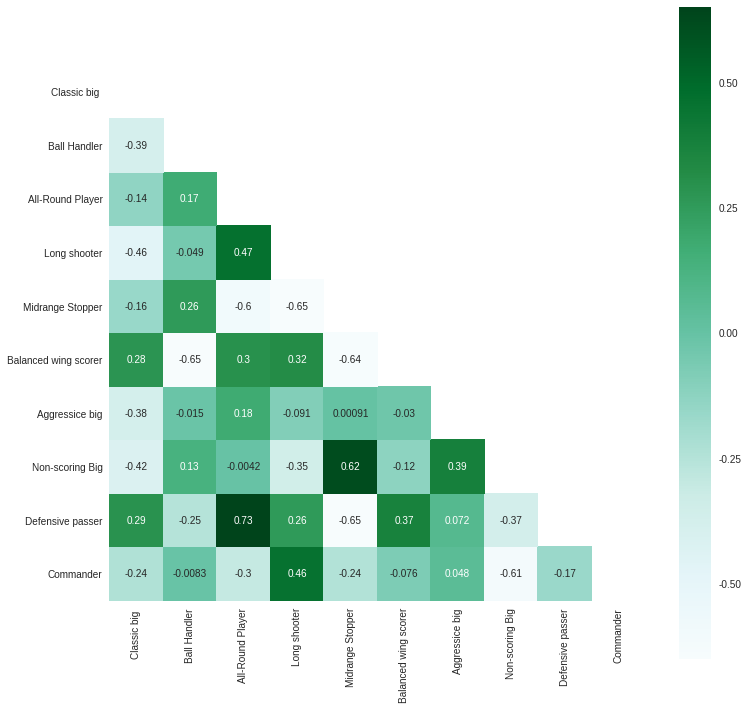

In [126]:
heatmap(season0.iloc[:-1,3:13].T)

### 2000년도 이후의 상관관계

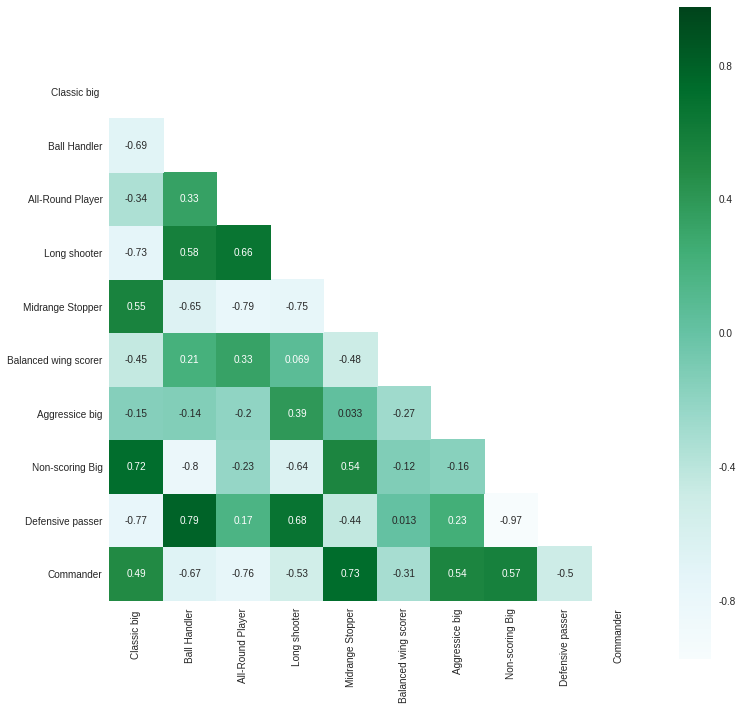

In [127]:
heatmap(season0.iloc[:-1,13:].T)

#### 모든 상관관계 값을 받아들이기 보다는, p_value값을 구해서 상관관계에 대한 검증을 해보도록 하겠다.

# p_value값을 구하기

In [128]:
import scipy as sp

In [129]:
def p_value(n,a,b):

    count = 0
    for i in range(10):
        for j in range(10):
            if i == j:
                pass
            elif i>j:
                pearson_r ,p_value = sp.stats.pearsonr(season0.iloc[i,a:b],season0.iloc[j,a:b])
                if p_value <0.05:
                    nba_pvalue.iloc[count,n] = i
                    nba_pvalue.iloc[count,n+1] = j
                    nba_pvalue.iloc[count,n+2] = pearson_r
                    count = count+1
                else:
                    pass


In [130]:
nba_pvalue = pd.DataFrame(np.zeros([10,12]))

In [137]:
p_value(9,13,21)

In [138]:
nba_pvalue

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,-0.454926,4.0,3.0,0.999703,4.0,3.0,-0.647022,3.0,0.0,-0.732605
1,3.0,0.0,-0.461253,7.0,2.0,0.997701,5.0,1.0,-0.651187,4.0,2.0,-0.790368
2,4.0,3.0,-0.685460,8.0,5.0,-1.000000,5.0,4.0,-0.642707,4.0,3.0,-0.746562
3,5.0,4.0,-0.638307,0.0,0.0,0.000000,8.0,2.0,0.727823,7.0,0.0,0.718075
4,7.0,3.0,-0.677715,0.0,0.0,0.000000,8.0,4.0,-0.649264,7.0,1.0,-0.803892
5,8.0,1.0,0.476686,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,0.0,-0.767160
6,8.0,3.0,0.694536,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,1.0,0.788591
7,8.0,4.0,-0.602096,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,7.0,-0.974609
8,8.0,7.0,-0.778688,0.0,0.0,0.000000,0.0,0.0,0.000000,9.0,2.0,-0.759712
9,9.0,3.0,0.437131,0.0,0.0,0.000000,0.0,0.0,0.000000,9.0,4.0,0.726238


In [139]:
nba_pvalue.columns = ["x_all","y_all","cor_all","x_1999","y_1999","cor_1999","x_2009","y_2009","cor_2009","x_2017","y_2017","cor_2017"]

In [140]:
nba_pvalue

,x_all,y_all,cor_all,x_1999,y_1999,cor_1999,x_2009,y_2009,cor_2009,x_2017,y_2017,cor_2017
0,1.0,0.0,-0.454926,4.0,3.0,0.999703,4.0,3.0,-0.647022,3.0,0.0,-0.732605
1,3.0,0.0,-0.461253,7.0,2.0,0.997701,5.0,1.0,-0.651187,4.0,2.0,-0.790368
2,4.0,3.0,-0.685460,8.0,5.0,-1.000000,5.0,4.0,-0.642707,4.0,3.0,-0.746562
3,5.0,4.0,-0.638307,0.0,0.0,0.000000,8.0,2.0,0.727823,7.0,0.0,0.718075
4,7.0,3.0,-0.677715,0.0,0.0,0.000000,8.0,4.0,-0.649264,7.0,1.0,-0.803892
5,8.0,1.0,0.476686,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,0.0,-0.767160
6,8.0,3.0,0.694536,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,1.0,0.788591
7,8.0,4.0,-0.602096,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,7.0,-0.974609
8,8.0,7.0,-0.778688,0.0,0.0,0.000000,0.0,0.0,0.000000,9.0,2.0,-0.759712
9,9.0,3.0,0.437131,0.0,0.0,0.000000,0.0,0.0,0.000000,9.0,4.0,0.726238


In [141]:
dic = {}
for i in range(10):
    dic[i] = season0.index[i]

In [142]:
nba_pvalue.iloc[3:,3:6] = np.nan
nba_pvalue.iloc[5:,6:9] = np.nan

In [143]:
nba_pvalue

,x_all,y_all,cor_all,x_1999,y_1999,cor_1999,x_2009,y_2009,cor_2009,x_2017,y_2017,cor_2017
0,1.0,0.0,-0.454926,4.0,3.0,0.999703,4.0,3.0,-0.647022,3.0,0.0,-0.732605
1,3.0,0.0,-0.461253,7.0,2.0,0.997701,5.0,1.0,-0.651187,4.0,2.0,-0.790368
2,4.0,3.0,-0.685460,8.0,5.0,-1.000000,5.0,4.0,-0.642707,4.0,3.0,-0.746562
3,5.0,4.0,-0.638307,NaN,NaN,NaN,8.0,2.0,0.727823,7.0,0.0,0.718075
4,7.0,3.0,-0.677715,NaN,NaN,NaN,8.0,4.0,-0.649264,7.0,1.0,-0.803892
5,8.0,1.0,0.476686,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,-0.767160
6,8.0,3.0,0.694536,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,0.788591
7,8.0,4.0,-0.602096,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,-0.974609
8,8.0,7.0,-0.778688,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.0,-0.759712
9,9.0,3.0,0.437131,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,0.726238


In [144]:
for i in [0,1,3,4,6,7,9,10]:
     nba_pvalue.iloc[:,i]=nba_pvalue.iloc[:,i].map(dic)

In [145]:
nba_pvalue

,x_all,y_all,cor_all,x_1999,y_1999,cor_1999,x_2009,y_2009,cor_2009,x_2017,y_2017,cor_2017
0,Ball Handler,Classic big,-0.454926,Midrange Stopper,Long shooter,0.999703,Midrange Stopper,Long shooter,-0.647022,Long shooter,Classic big,-0.732605
1,Long shooter,Classic big,-0.461253,Non-scoring Big,All-Round Player,0.997701,Balanced wing scorer,Ball Handler,-0.651187,Midrange Stopper,All-Round Player,-0.790368
2,Midrange Stopper,Long shooter,-0.685460,Defensive passer,Balanced wing scorer,-1.000000,Balanced wing scorer,Midrange Stopper,-0.642707,Midrange Stopper,Long shooter,-0.746562
3,Balanced wing scorer,Midrange Stopper,-0.638307,NaN,NaN,NaN,Defensive passer,All-Round Player,0.727823,Non-scoring Big,Classic big,0.718075
4,Non-scoring Big,Long shooter,-0.677715,NaN,NaN,NaN,Defensive passer,Midrange Stopper,-0.649264,Non-scoring Big,Ball Handler,-0.803892
5,Defensive passer,Ball Handler,0.476686,NaN,NaN,NaN,NaN,NaN,NaN,Defensive passer,Classic big,-0.767160
6,Defensive passer,Long shooter,0.694536,NaN,NaN,NaN,NaN,NaN,NaN,Defensive passer,Ball Handler,0.788591
7,Defensive passer,Midrange Stopper,-0.602096,NaN,NaN,NaN,NaN,NaN,NaN,Defensive passer,Non-scoring Big,-0.974609
8,Defensive passer,Non-scoring Big,-0.778688,NaN,NaN,NaN,NaN,NaN,NaN,Commander,All-Round Player,-0.759712
9,Commander,Long shooter,0.437131,NaN,NaN,NaN,NaN,NaN,NaN,Commander,Midrange Stopper,0.726238


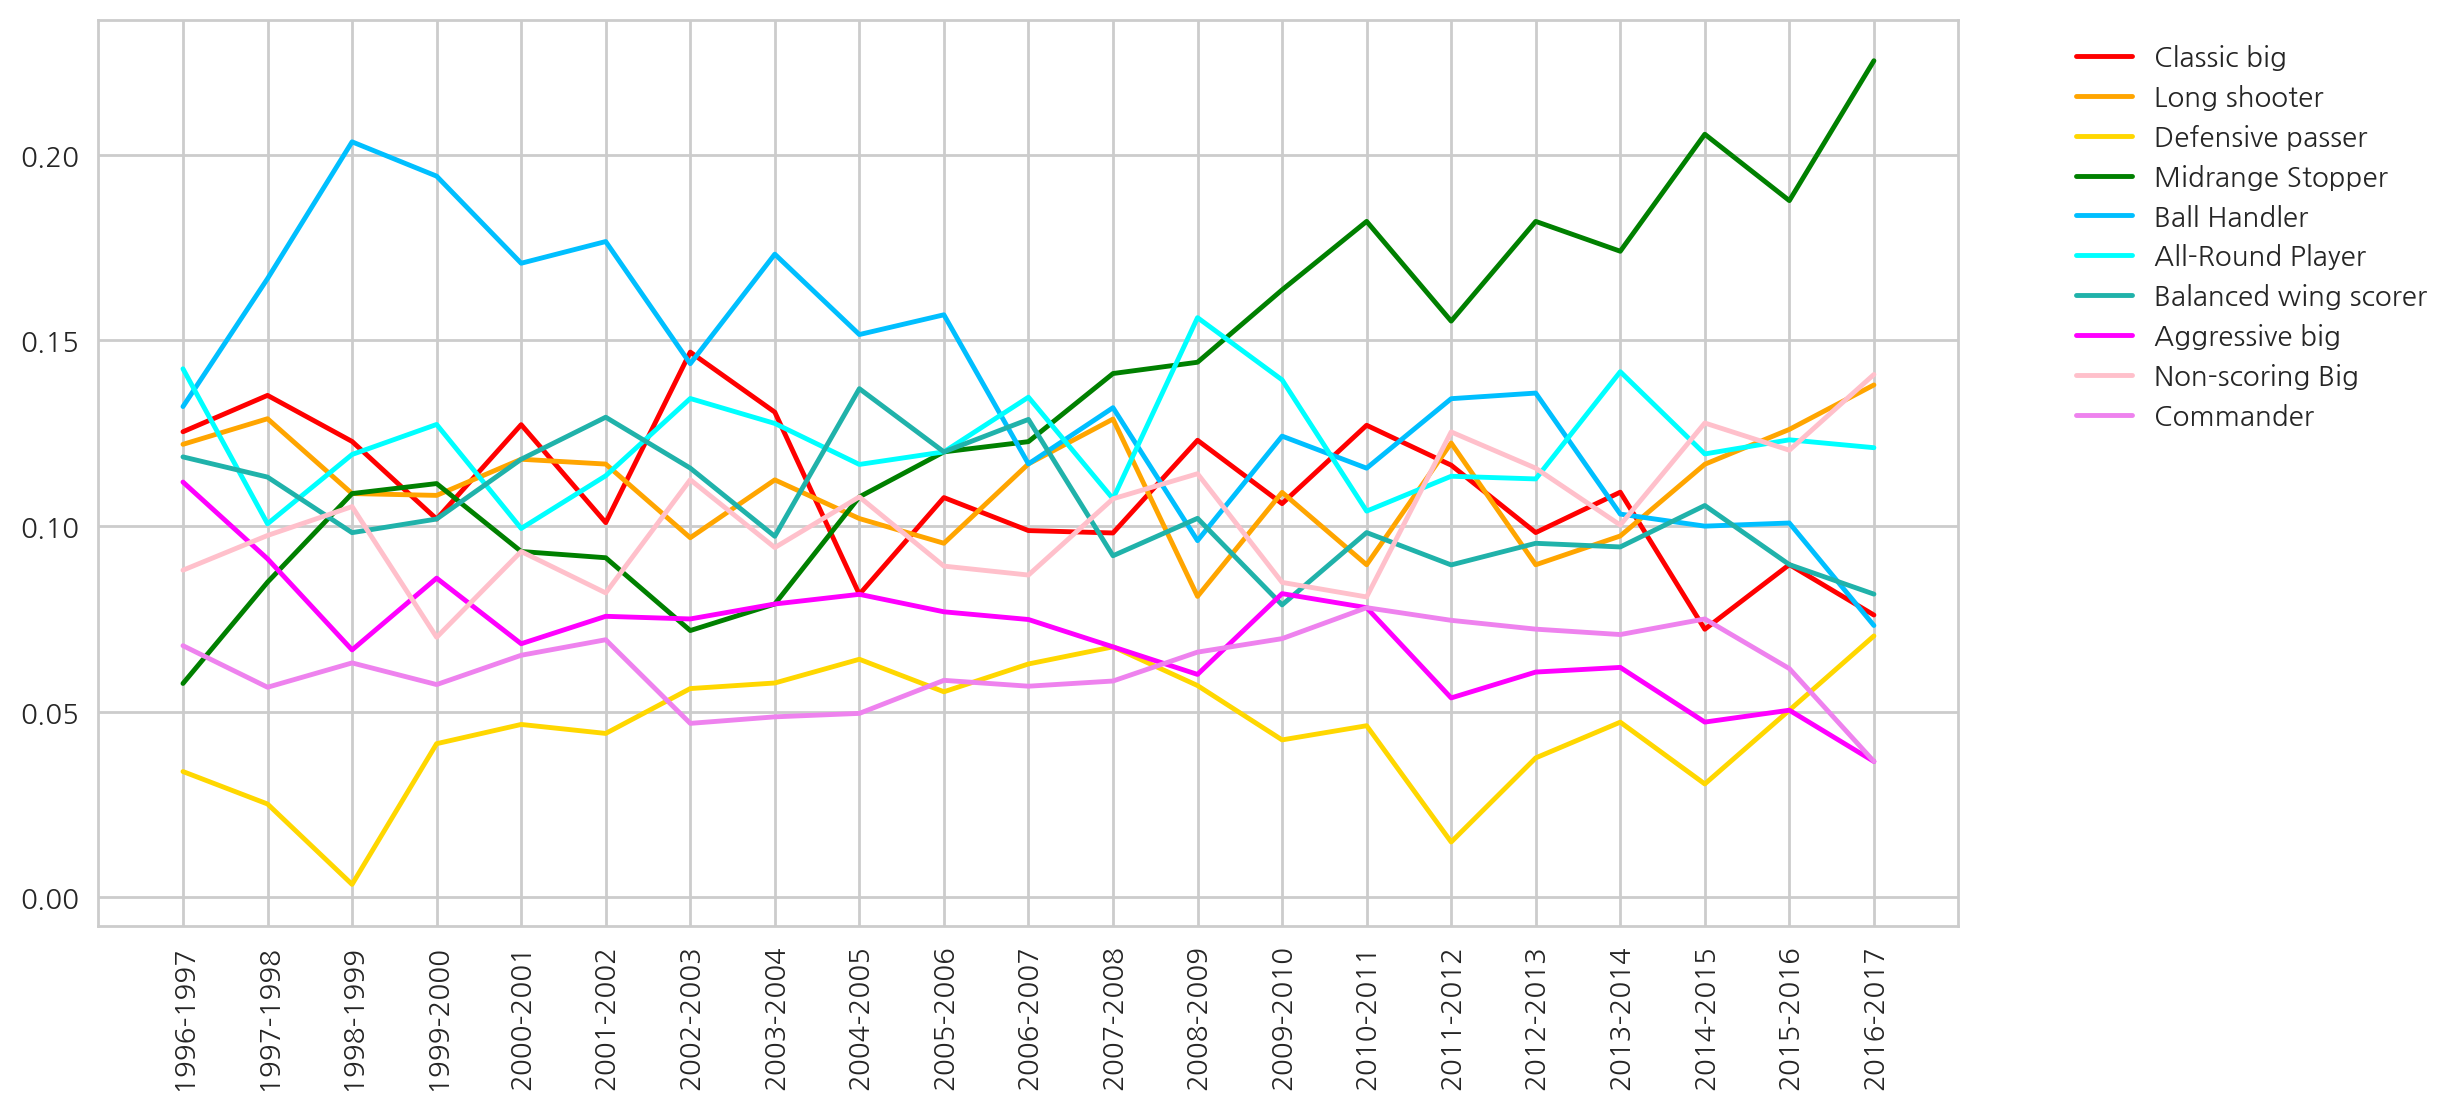

### 전체시즌의 상관관계에서 나눠서 살펴보면,
<시대별 농구 흐름>
- 1990 ~ 1999 : 센터의 시대(4대 센터)(센터 위주의 농구로, 빠른 공격보다는 지공을 위주로 공격을 하는 팀이 많았다.)
- 2000 ~ 2009 : 슈팅가드의 전성시대(슈팅가드 들이 본인이 직접 득점을 하는 식으로 공격을 마무리 짓는 팀이 많았다.)
- 2010 ~ 2017 : 스몰볼 시대(스몰볼은 라인업 사이즈를 작게 함으로써, 공격속도 등을 빠르게 가져가는 농구를 의미한다.)


<시대별 흐름에 따른 포지션 분석>
- 포지션별 이동이 가능하며 음의 관계,

 Balanced wing scorer, Midrange Stopper<br />
 Midrange Stopper, Long shooter<br />
<br />

- 포지션별 이동이 가능하나 양의관계

 Defensive passer, Long shooter<br />
 Commander, Long shooter<br />
<br />	

- 포지션별 이동이 불가능하나 음의관계

 Defensive passer, Ball Handler<br />
 Defensive passer, Midrange Stopper<br />
 Ball Handler, Classic big<br />
 Long shooter, Classic big<br />
 Non-scoring Big, Long shooter<br />
 Defensive passer,  Non-scoring Big<br />


<br />
1. 포지션별 이동이 가능하며 음의 관계를 갖는 것은, 서로가 대체 관계를 갖는 것으로 예상되며,
2. 포지션별 이동이 가능하나 양의관계를 갖거나 포지션별 이동이 불가능하나 음의관계를 갖는 것은,
   다른 요인(농구 전략의 변화)등으로 인해 같이 증가되는 것으로 예상된다.

<br />

3점을 많이 던지는 2000년 대부터는 Long shooter 및 Midrange Stopper들이 꾸준히 증가함을 회귀선 등을 통해 알 수 있었는데, 그에 따라서 3점슛보다 가까운 거리에서 던지는 Midrange Stopper는 감소하고 있음을 알 수 있다.

<br />

포지션별 이동이 불가능하나 음의관계를 갖는 것 중에서는 Long shooter와 Non-scoring Big,Classic big 등이 있는데,
이는 기존 센터 위주의 농구에서 벗어나서 슈터 및 3점위주의 농구로의 전환되었음을 의미한다.

# 4. Conclusion & further reserch
### Conclusion

- **K-Means 클러스터링**을 이용하여 NBA Position에 대해 기존의 5가지의 분류와는 다른 **새로운 10가지 포지션으로의 분류**를 시행함

- **새롭게 정의한 포지션** 별 년도별 흐름 파악

### further research
- 수비에 관한 구체적인 기록들이 클러스터링 부분에 많이 반영되지 않아 향후 **수비 관련 지표들에 대해 더 추가하여 반영할 필요**가 있음

- **2차 스탯 및 플레이오프 스탯** 등을 반영할 수 있는 더 정교한 모델 및 클러스터링 작업과 추가적 데이터 확보




# 5. References
1. A new perspective on positions in baskerball players using cluster analysis
http://www.sloansportsconference.com/wp-content/uploads/2012/02/44-Lutz_cluster_analysis_NBA.pdf

2. Modern NBA player positions - using Unsupervised clustering to uncover Functional Roles in Basketball도 참고)
https://medium.com/hanman/the-evolution-of-nba-player-positions-using-unsupervised-clustering-to-uncover-functional-roles-a1d07089935c

3. A New Perspective On Positions In Basketball Players Using Cluster Analysis
http://www.academia.edu/28430572/A_New_Perspective_On_Positions_In_Basketball_Players_Using_Cluster_Analysis

4. NBA.com Player, Combination, Team stats
5. NBAminer Player stats
6. http:// Basketball-reference.com
<br /